# Linear Regression - Mileage Prediction for mtcars

Objective: Predict the "Mileage" of Cars based on different Predictors using Linear Regression ML Algorithm

In [56]:
# Import all the necessary required modules

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
from scipy import stats
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [7]:
# Import the 'mtcars' dataset --> mtcars.csv

data = pd.read_csv('C:\\Users\\sumit\\Desktop\\ML - Regression\\mtcars.csv')

In [9]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
data.shape  # to know dataset size

(32, 12)

In [58]:
data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


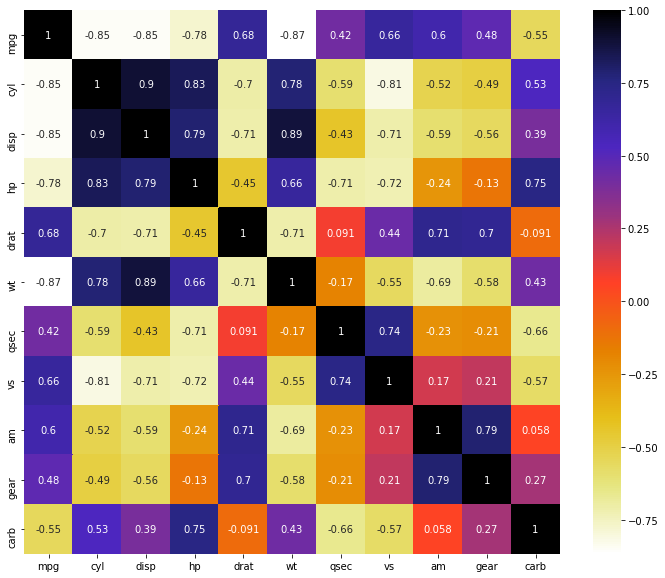

In [59]:
# Using Pearson Correlation
import seaborn as sns
pyplot.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=pyplot.cm.CMRmap_r)
pyplot.show()

In [11]:
# Linear Regression is used to predict the 'mpg'(Mileage) == y
# Using the predictors like 'hp'(Horse Power), 'wt'(Weight) == X

# Checking for Normality Test for all the predictors
print("Range of SKEWNESS and KURTOSIS to be between -1 and +1 for all the Predictors")

# Measure of Skewness
print("Skewness of 'hp': ", stats.skew(data.hp))
print("Skewness of 'wt': ", stats.skew(data.wt))

# Measure of Kurtosis
print("Kurtosis of 'hp': ", stats.kurtosis(data.hp))
print("Kurtosis of 'wt': ", stats.kurtosis(data.wt))

Range of SKEWNESS and KURTOSIS to be between -1 and +1 for all the Predictors
Skewness of 'hp':  0.7614356361333623
Skewness of 'wt':  0.44378553550607736
Kurtosis of 'hp':  0.05223272840399584
Kurtosis of 'wt':  0.1724705401587343


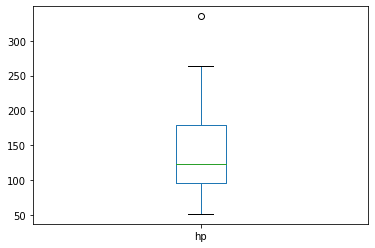

In [31]:
# Check for Outliers
data.hp.plot(kind='box');

In [15]:
data.describe()     # univariate analysis

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


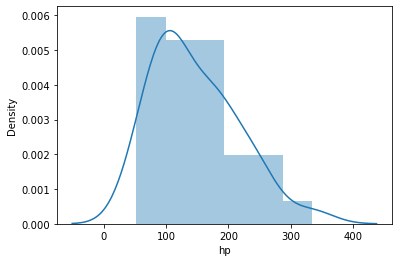

In [16]:
# Visually respresenting this for 'hp'
%matplotlib inline
sb.distplot(data.hp);

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


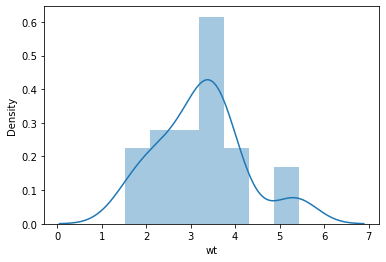

In [17]:
# Visually respresenting this for 'wt'
%matplotlib inline
sb.distplot(data.wt);

In [18]:
# Declaring the Predictors and Target variables

X = data.loc[:,['hp', 'wt']]
y = data.mpg

In [19]:
X.head()

,hp,wt
0,110,2.620
1,110,2.875
2,93,2.320
3,110,3.215
4,175,3.440


In [20]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [21]:
# Splitting the dataset into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=14)

In [23]:
# Verify the shape(number of records) after split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27, 2)
X_test shape: (5, 2)
y_train shape: (27,)
y_test shape: (5,)


In [26]:
# Defining the Linear Regression Model
model = LinearRegression()

In [27]:
# By passing the X, y train data fit the model
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict y (mpg) by passing the X_test
y_predict = model.predict(X_test)

In [30]:
# Estimating the accuracy of the model using 'r2 score'
r2_score(y_test, y_predict)*100

58.614337687975215

Model is around 53% accurate which is not great enough

In [32]:
# Find out the maximum value causing it to be outlied
print("Max 'hp':", data.hp.max())

data[data.hp == data.hp.max()]

Max 'hp': 335


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [33]:
# Shape of dataset before outlier removal
data.shape

(32, 12)

In [37]:
 #Dropping the outlier record from the dataset
data_without_outlier = data.drop(index=30)
# Shape of dataset after outlier removal - new updated dataset named 'data_without_outlier'
data_without_outlier.shape

(31, 12)

In [38]:
# Run the entire model again with new updated dataset after removal of the outlier

# Declaring the Predictors and Targets
X = data_without_outlier.loc[:,['hp', 'wt']]
y = data_without_outlier.mpg

# Split the new updated dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=14)

# Defining the Model
model = LinearRegression()

# Fitting the Model
model.fit(X_train, y_train)

# Perform prediction
y_predict = model.predict(X_test)

# Measure the accuracy
r2_score(y_test, y_predict)*100

95.83680916832566

In [60]:
y_test

2     22.8
29    19.7
27    30.4
19    33.9
3     21.4
Name: mpg, dtype: float64

In [61]:
y_predict

array([25.88673156, 19.07506088, 25.86851359, 28.55301179, 20.29240121])

Comparing the values of y_test and y_predict they both are alomost closer !!